# Comprehensive Predictive Modeling of Ames House Prices

1. Introduction (200 words)
•	Overview of Real Estate Price Prediction (100 words): Discuss the significance of predicting real estate prices, its impact on industries like marketing, business intelligence, and urban planning.
•	Scope and Objectives (50 words): Outline the aims of the research, including developing predictive models and evaluating their effectiveness.
•	Structure of the Report (50 words): Briefly describe the structure of the report, summarizing the main sections.


# 2. Exploratory Data Analysis
2.1 Dataset Description

•	Description of the Dataset (100 words): Explain the key attributes (e.g., zoning, lot size, building characteristics, neighborhood factors).
•	Source (25 words): Cite the dataset source (e.g., Kaggle, UCI Machine Learning Repository).

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

Load data

In [3]:
dataset = pd.read_csv("house-price-data-apr2024.csv")
dataset.head()

,LotFrontage,LotArea,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,MasVnrArea,ExterQual,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,Lvl,1Fam,2Story,7,5,Gable,196.0,Gd,...,TA,TA,0,61,0,0,0,0,0,208500
1,80.0,9600,Lvl,1Fam,1Story,6,8,Gable,0.0,TA,...,TA,TA,298,0,0,0,0,0,0,181500
2,68.0,11250,Lvl,1Fam,2Story,7,5,Gable,162.0,Gd,...,TA,TA,0,42,0,0,0,0,0,223500
3,60.0,9550,Lvl,1Fam,2Story,7,5,Gable,0.0,TA,...,TA,TA,0,35,272,0,0,0,0,140000
4,84.0,14260,Lvl,1Fam,2Story,8,5,Gable,350.0,Gd,...,TA,TA,192,84,0,0,0,0,0,250000


2.2 Sale Price

Text(0.5, 1.0, 'House Price Distribution')

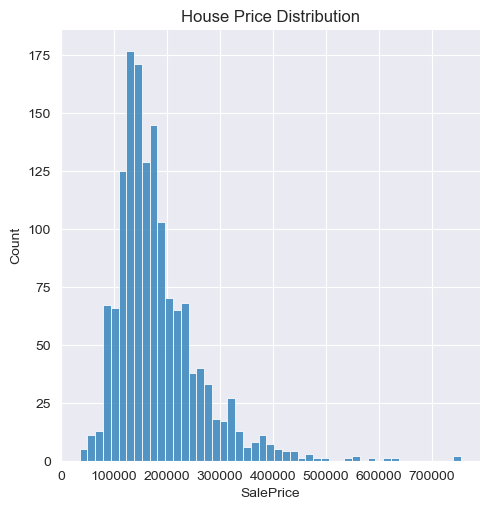

In [17]:
saleprice = dataset["SalePrice"]
sns.displot(saleprice)
plt.title("House Price Distribution")

From the plot the distribution of ```SalePrice``` data is apparently right skewed. Its Skewness and Kurtosis statistics are checked.This was expected as few people can afford very expensive houses.

In [5]:
print(f"""Skewness: {saleprice.skew()}
Kurtosis: {saleprice.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


2.3 Numerical Features 

There are total 31 numercial features. 

In [6]:
df = dataset
numeric_data = df.select_dtypes(include="number")
numeric_list = numeric_data.columns.tolist()
numeric_list.remove("SalePrice")
print("Number of numerical variables：" , len(numeric_list))

Number of numerical variables： 31


C:\Users\Claire\AppData\Local\Temp\ipykernel_22704\2287352246.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_high = corr[abs(corr_sorted)>0.4].index.tolist()


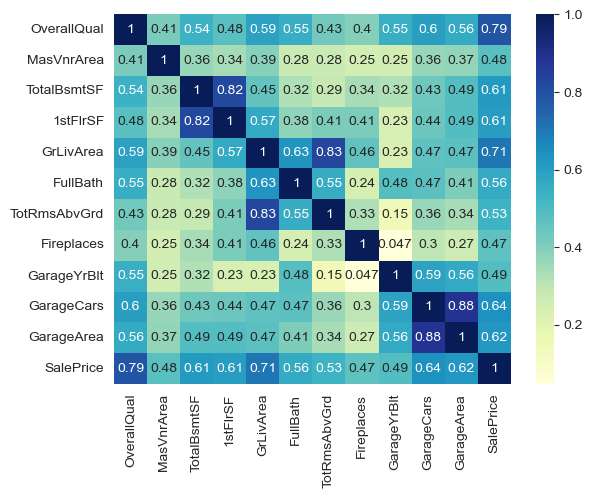

In [16]:
corr = numeric_data.corr()

corr_sorted = corr["SalePrice"].sort_values(ascending=False)
corr_high = corr[abs(corr_sorted)>0.4].index.tolist()
corr_numVar = corr.loc[corr_high,corr_high]

sns.heatmap(corr_numVar, cmap="YlGnBu", annot=True)
plt.show()